# Demo of bboxconverter

This notebook demonstrates the use of the `bboxconverter` package.


## Converting bbox from CSV

In this example, we will convert a csv file containing bounding boxes in the format `tlwh` to `tlbr` and `cwh` formats.


In [1]:
import bboxconverter as bc

# Input file path
input_path1 = './examples/csv_convert_demo/example1_tlwh.csv'

# Output file path
output_tlbr = './examples/csv_convert_demo/example1_tlbr.csv'
output_cwh = './examples/csv_convert_demo/example1_cwh.csv'

# Mapping between the input file and the bboxconverter format
bbox_map = dict(
    class_name='class',
    file_path='name',
    x_min='top_left_x',
    y_min='top_left_y',
    width='w',
    height='h',
    image_width='img_size_x',
    image_height='img_size_y',
)

# Read the input file
parser = bc.read_csv(input_path1, mapping=bbox_map)

# Export the file to the desired format
parser.to_csv(output_path=output_tlbr, type='tlbr')
parser.to_csv(output_path=output_cwh, type='cwh')

print(f"File saved to {output_tlbr} and {output_cwh}")


File saved to ./examples/csv_convert_demo/example1_tlbr.csv and ./examples/csv_convert_demo/example1_cwh.csv


## Exporting to popular formats (COCO, VOC, YOLO) from Manifest

In this example, we will convert a file containing bounding boxes in popular format like `COCO`, `VOC` and `YOLO` formats.

In [2]:
import bboxconverter as bc

# Input file path
input_path2 = './examples/manifest_export_demo/example.manifest'

# Output file path
output_coco = './examples/manifest_export_demo/coco.json'
output_pascal_voc = './examples/manifest_export_demo/pascal_voc.xml'
output_yolo = './examples/manifest_export_demo/yolo.txt'

# Configuration of the manifest file
config = {
    'labelling-job-name': 'crh-label-test5',
    'labelling-job-metadata': 'crh-label-test5-metadata',
}

# Read the input file
parser = bc.read_manifest(input_path2, configuration=config)

# Export the file to the desired format
parser.export(output_path=output_coco, format='coco')
parser.export(output_path=output_pascal_voc, format='voc')
parser.export(output_path=output_yolo, format='yolo')


Not implemented yet
Not implemented yet


## Preparing a COCO dataset

In this example, we will prepare a `COCO` dataset using `bboxconverter` package.

In this example, we have the following files and folders:

* `images` folder containing images
* `cat_dog.csv` file containing bounding boxes in `tlwh` format

We will convert the `cat_dog.csv` file to `COCO` format and save it in `coco.json` file.
Furthermore, we will also split the dataset into train and validation sets including the images as well.


In [3]:
import bboxconverter as bc

# Input file path
input_path2 = './examples/csv_prepare_coco_dataset/cat_dog.csv'

# Output file path
output_coco = './examples/csv_prepare_coco_dataset/coco.json'

# Mapping between the input file and the bboxconverter format
bbox_map = dict(
    class_name='rectanglelabels',
    file_path='file_name',
    x_min='x',
    y_min='y',
    width='width',
    height='height',
    image_width='original_width',
    image_height='original_height',
)

# Read the input file
parser = bc.read_csv(input_path2, mapping=bbox_map)

# Export the file to the desired format
parser.export(output_path=output_coco, format='coco', split=True)

              file_path       x_min      y_min       width      height  \
1  ./images/image2.jpeg   36.604096  44.576923  111.220137   93.376923   
3  ./images/image4.jpeg    5.612628  28.595745   93.883959  120.000000   
2  ./images/image3.jpeg  140.991468   9.285714   84.860068  115.408163   
4  ./images/image5.jpeg  160.025597  79.300000   99.957338   67.100000   

   rotation class_name  image_width  image_height  
1         0        cat          275           183  
3         0        cat          299           168  
2         0        cat          259           195  
4         0        cat          275           183                 file_path       x_min      y_min       width      height  \
0  ./images/image1.jpeg  404.095563  99.662469  346.757679  442.337531   

   rotation class_name  image_width  image_height  
0         0        cat          800           542  


### Displaying bounding boxes

In this section we will display bounding boxes on images using pycocotools package.


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
COCO categories: 
cat



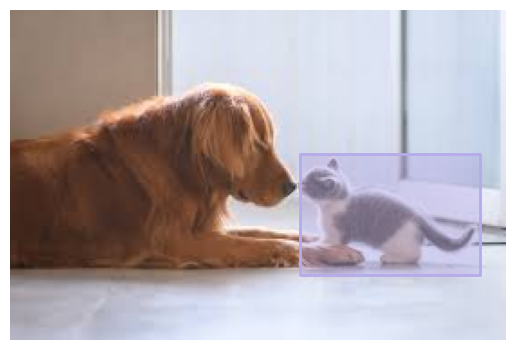

In [4]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO

# Load COCO annotations
workdir = './examples/csv_prepare_coco_dataset/train'
annFile = f'{workdir}/coco.json'
coco = COCO(annFile)
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print(f'COCO categories: \n{" ".join(nms)}\n')

# Get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['cat', 'dog'])
imgIds = coco.getImgIds(catIds=catIds)
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

# Load and display image
I = io.imread(
    f'{workdir}/{img["file_name"]}'
)
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)
